# Customer Satisfaction Analysis


This project analyzes customer satisfaction data using logistic and linear regression. The goal is to predict whether a customer was satisfied or not based on service-related features.


In [5]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import LabelEncoder



## Load Dataset

Reading the dataset from the system and viewing the first few records.


In [6]:

df = pd.read_csv("C:/Users/Madhusmita/Downloads/cust_satisfaction.csv")
df.head()


,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0


## Check for Null Values and Dataset Info


In [7]:
# Dataset structure
df.info()

# Null values in each column
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      103904 non-null  object 
 1   Customer Type               103904 non-null  object 
 2   Type of Travel              103904 non-null  object 
 3   Class                       103904 non-null  object 
 4   satisfaction                103904 non-null  object 
 5   Age                         103904 non-null  int64  
 6   Flight Distance             103904 non-null  int64  
 7   Inflight entertainment      103904 non-null  int64  
 8   Baggage handling            103904 non-null  int64  
 9   Cleanliness                 103904 non-null  int64  
 10  Departure Delay in Minutes  103904 non-null  int64  
 11  Arrival Delay in Minutes    103594 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 9.5+ MB


Gender                          0
Customer Type                   0
Type of Travel                  0
Class                           0
satisfaction                    0
Age                             0
Flight Distance                 0
Inflight entertainment          0
Baggage handling                0
Cleanliness                     0
Departure Delay in Minutes      0
Arrival Delay in Minutes      310
dtype: int64

In [25]:
df.dropna(inplace=True)


In [26]:
## Define Features and Target

# We'll predict the 'satisfaction' column using all other features.


df["satisfaction"]=df["satisfaction"].map({"satisfied": 1, "neutral or dissatisfied": 0})


In [27]:
df_encoded = pd.get_dummies (df,drop_first = True)

## EDA

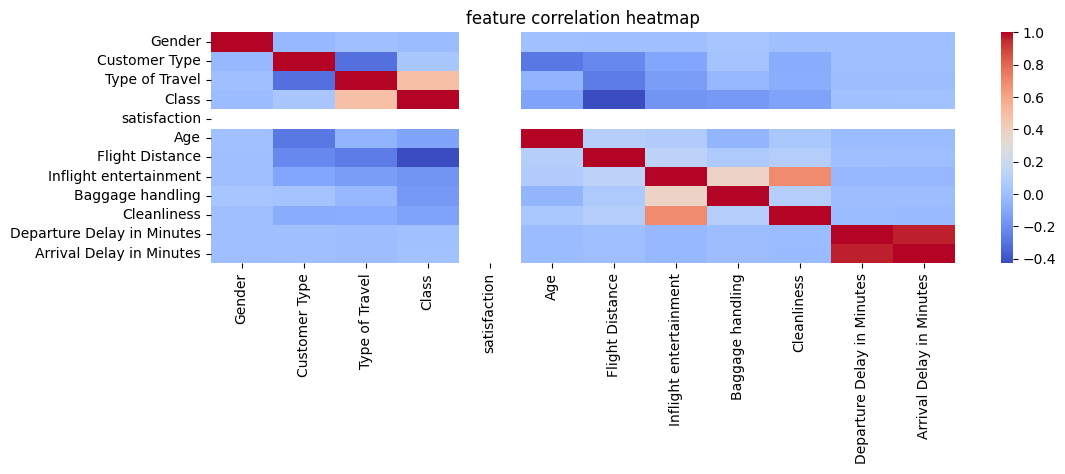

In [28]:
# correlation heatmap:

plt.figure(figsize=(12,3))
sns.heatmap(df_encoded.corr() , cmap="coolwarm", annot=False)

plt.title("feature correlation heatmap")
plt.show()

In [ ]:
# satisfaction distribution:
sns.countplot(x="satisfaction",data=df)
plt.title("customer satisfactiondistribution")


## Logistic Regression

Using logistic regression to classify customer satisfaction.


In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaling done. X_train_scaled shape:", X_train_scaled.shape)



Scaling done. X_train_scaled shape: (83123, 11)


In [24]:
# Logistic Regression Model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

# Predictions and accuracy
y_pred_log = log_model.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [18]:
# Linear Regression Model
lin_model = LinearRegression()
lin_model.fit(X_train_scaled, y_train)

y_pred_lin = lin_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred_lin)
print("Linear Regression MSE:", mse)


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [19]:
# Final comparison
print("📊 Model Performance Summary")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")
print(f"Linear Regression MSE: {mse:.4f}")


📊 Model Performance Summary


NameError: name 'y_pred_log' is not defined